<a href="https://colab.research.google.com/github/K-107/Anomaly-Detection/blob/main/PatchCore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PatchCore - anomaly detection

## 1. 참고 사이트들

### PatchCore 논문

https://arxiv.org/abs/2106.08265

### MVtec Ad 데이터셋 사이트

https://www.mvtec.com/company/research/datasets/mvtec-ad

### PatchCore Unofficial code - 개인 데이터셋엔 안 맞음

https://github.com/hcw-00/PatchCore_anomaly_detection

### Code for industry - 여기가 개인 데이터셋에 최적

https://github.com/dhkdnduq/PatchCore_anomaly_detection

### 내 깃에 포크하고 에러 퇴치 및 데이터셋 업로드

https://github.com/K-107/PatchCore_anomaly_detection

### 에러 퇴치에 도움을 준 사이트

https://pythonrepo.com/repo/hcw-00-PatchCore_anomaly_detection

https://github.com/facebookresearch/d2go/issues/71

https://github.com/pytorch/vision/issues/4156

## 2. 모델 설명

### 모델 구조

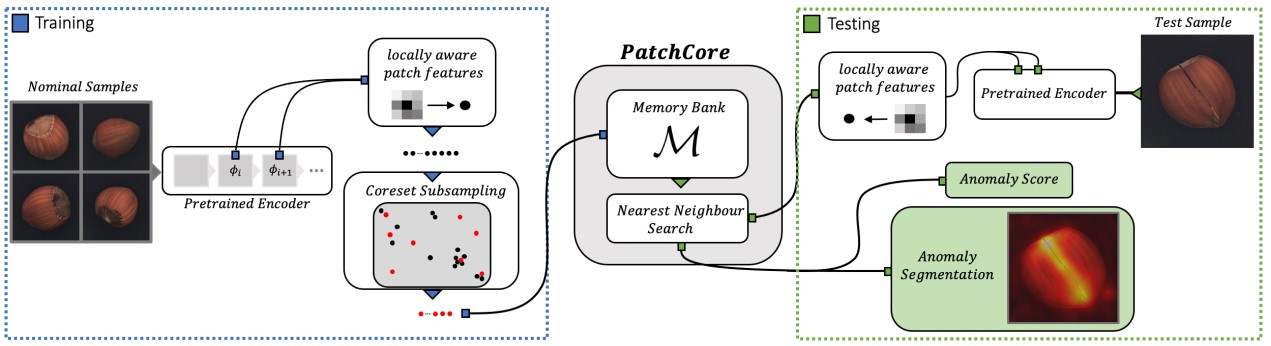


### 백본: wide_resnet50_2

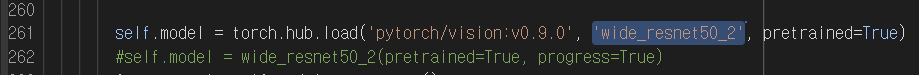

## 3. 깃클론으로 깃허브 코드 및 데이터셋 로드

In [1]:
# 깃허브에 포크한 주소 깃클론
! git clone https://github.com/K-107/PatchCore_anomaly_detection.git

Cloning into 'PatchCore_anomaly_detection'...
remote: Enumerating objects: 1776, done.
remote: Counting objects: 100% (1131/1131), done.
remote: Compressing objects: 100% (1103/1103), done.
remote: Total 1776 (delta 28), reused 1123 (delta 25), pack-reused 645
Receiving objects: 100% (1776/1776), 2.07 GiB | 37.56 MiB/s, done.
Resolving deltas: 100% (124/124), done.
Checking out files: 100% (1016/1016), done.


In [2]:
# 깃포크한 디렉토리로 위치 이동
%cd /content/PatchCore_anomaly_detection

/content/PatchCore_anomaly_detection


In [3]:
# 코드 실행에 필요한 라이브러리 설치
!pip install -r requirements.txt

     |████████████████████████████████| 51.0 MB 57 kB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 806 kB 35.8 MB/s 
     |████████████████████████████████| 274 kB 55.7 MB/s 
     |████████████████████████████████| 804.1 MB 2.6 kB/s 
     |████████████████████████████████| 17.4 MB 124 kB/s 
     |████████████████████████████████| 7.1 MB 36.7 MB/s 
     |████████████████████████████████| 282 kB 47.7 MB/s 
     |████████████████████████████████| 829 kB 38.5 MB/s 
     |████████████████████████████████| 125 kB 47.2 MB/s 
     |████████████████████████████████| 1.3 MB 37.1 MB/s 
     |████████████████████████████████| 271 kB 49.9 MB/s 
     |████████████████████████████████| 160 kB 47.2 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=3f4ef3e0303889c9f6ad6ec62f4e8eba1e67acfccc50f32068dc31167e685516
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703

## 4. 모델에 넣을 데이터 경로 지정

이미 깃허브에 샘플 데이터를 아래와 같은 경로로 지정해 놓음.
테스트할 때는 신경쓸 필요 없고 실제 자신의 데이터로 훈련 및 테스트할 때 주의

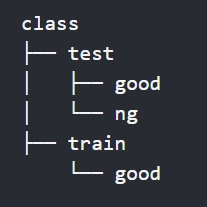



## 5. 훈련 및 테스트

In [4]:
# 테스트 결과를 저장할 디렉토리
!mkdir results

In [14]:
#######################################################
####################   훈련   #########################
##
## !python train.py \ -> 트레인 파일 실행
## --phase=train \ -> 훈련 과정
## --dataset_path= 경로 \ -> 데이터셋 경로
## --category= 클래스 이름 \ -> 클래스 이름 지정. 폴더 이름과 같아야한다.
## --num_epochs= 숫자 \ -> 에폭
## --project_root_path= 경로 \ -> 결과 경로
## --n_neighbors=9 -> kNN(k-Nearest Neighbors)
##
#######################################################

!python train.py \
--phase=train \
--dataset_path=/content/PatchCore_anomaly_detection/datasets \
--category=carpet \
--num_epochs=1 \
--project_root_path=/content/PatchCore_anomaly_detection/results \
--n_neighbors=9

#######################################################
###################  추가 설명  #######################
##
## pre-train된 restnet 50을 사용해서 가중치 학습이 없다.
## 
##
#######################################################

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer
  warnings.warn(*args, **kwargs)

  | Name          | Type      | Params
--------------------------------------------
0 | model         | ResNet    | 68.9 M
1 | criterion     | MSELoss   | 0     
2 | inv_normalize | Normalize | 0     
--------------------------------------------
0         Trainable params
68.9 M    Non-trainable params
68.9 

In [15]:
#######################################################
####################   테스트 #########################
#######################################################
##
## !python train.py \ -> 트레인 파일 실행
## --phase=test \ -> 테스트 과정
## --dataset_path= 경로 \ -> 데이터셋 경로
## --category= 클래스 이름 \ -> 클래스 이름 지정. 폴더 이름과 같아야한다.
## --num_epochs= 숫자 \ -> 에폭
## --project_root_path= 경로 \ -> 결과 경로
## --n_neighbors=9 -> kNN(k-Nearest Neighbors)
##
#######################################################
!python train.py \
--phase=test \
--dataset_path=/content/PatchCore_anomaly_detection/datasets \
--category=carpet \
--num_epochs=1 \
--project_root_path=/content/PatchCore_anomaly_detection/results \
--n_neighbors=9

#######################################################
###################  추가 설명  #######################
##
## 히스트플롯은 histplot_for_anomaly_map 폴더에 저장된다.
## 이 히스트플롯에 정상, 이상치 임계값을 나타내는 jpg가 저장된다.
## best threshold는 모델이 자동으로 분류해서 아래 실행 결과에 나타낸다.
##
#######################################################

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.9.0
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Testing: 100% 93/93 [00:19<00:00,  5.12it/s]
best threshold=[1.5500158071517944]
Testing: 100% 93/93 [00:20<00:00,  4.47it/s]
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


## 6. 결과보기

훈련 및 테스트에서 지정한 project_root_path 경로의 category에서 sample에 저장됨.

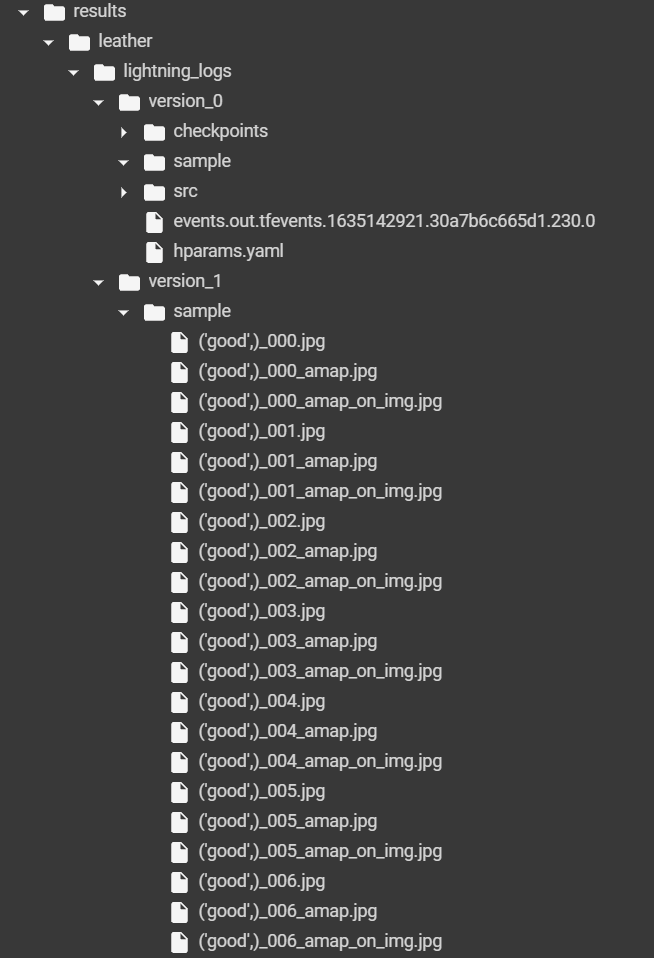

테스트

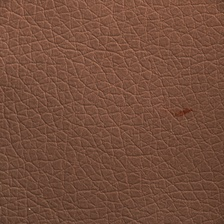



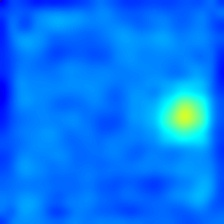